# __Create a spatial domain__

### Problem statement

A model volume can consist of one or many so called “spatial domains”. Domains are used to delineate volumes to analyse or create fracture networks. Depending on the nature of the problem, domains can have many different shapes. 



<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/domains.png" width="800"/>
</div>
<br>
Example of domain geometries that can be handled in DFN.Lab
</center>

### What will you learn ?
- Create a box domain
- Create a spherical domain
- Create a complex domain from geometry files

### DFN.Lab model

The  __Domains__ module contains all functionnalities related to Domain creation.
Note that DFN.Lab operates unitless. In the tutorials we use SI units for clarity.

In [1]:
import dfnlab.Domains as dom

_____________

# Create a domain as a box

We create a cubic domain centered on (0,0,0) with side length 100m in each direction.

In [2]:
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=100.)

The *plot_domain* function provided in the *source* folder create a 3D view of the domain: we save a vtp file in the "Tmp" subdirectory and plot it in the Notebook.

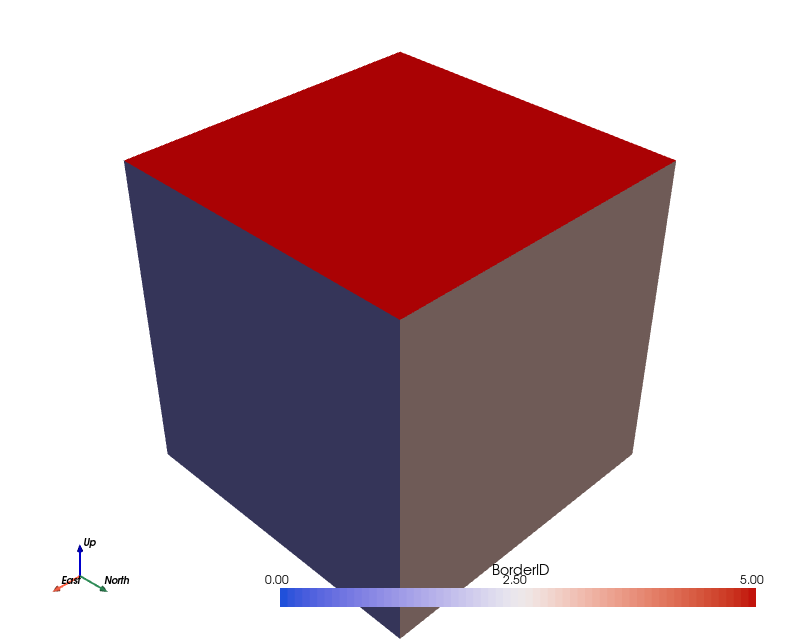

In [3]:
from sources.functions import plot_domain
plot_domain(domain,value="BorderID")

Or a parallelepiped, with different sizes in the x,y and z directions. Note that DFN.lab orientation convention sets that x- and y-axis are aligned with East and North directions respectively.

In [4]:
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=100., L2=200., L3=50.)

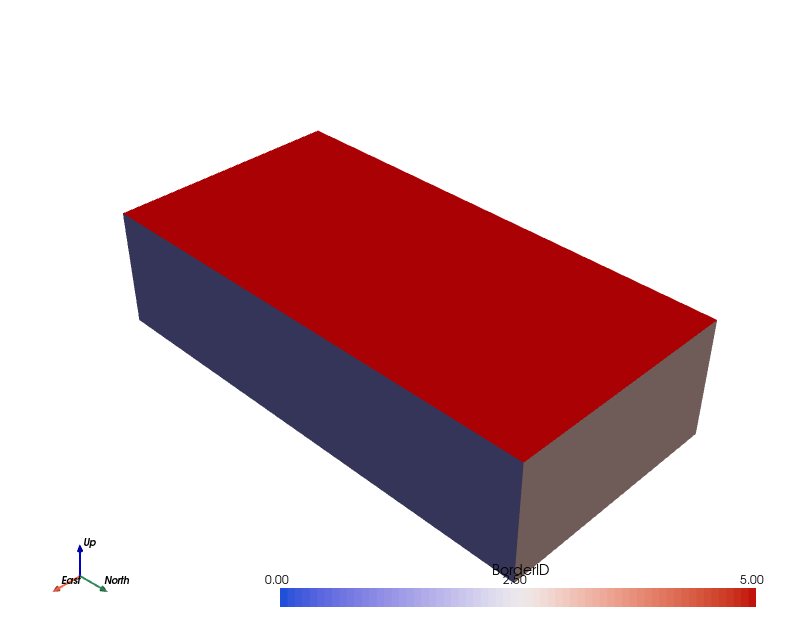

In [5]:
plot_domain(domain,value="BorderID")

_____________

# Create a spherical domain

We create a spherical domain centered on (0,0,0) of diameter 100m. The sphere is defined by a 3D polyhedron and the resolution depends on the division depth. This kind of spatial domain may be interesting to assess tensorial effective properties such as permability.

In [6]:
domain = dom.Domain()
domain.buildSphere(center=[0, 0, 0],diameter=100.,division=3)

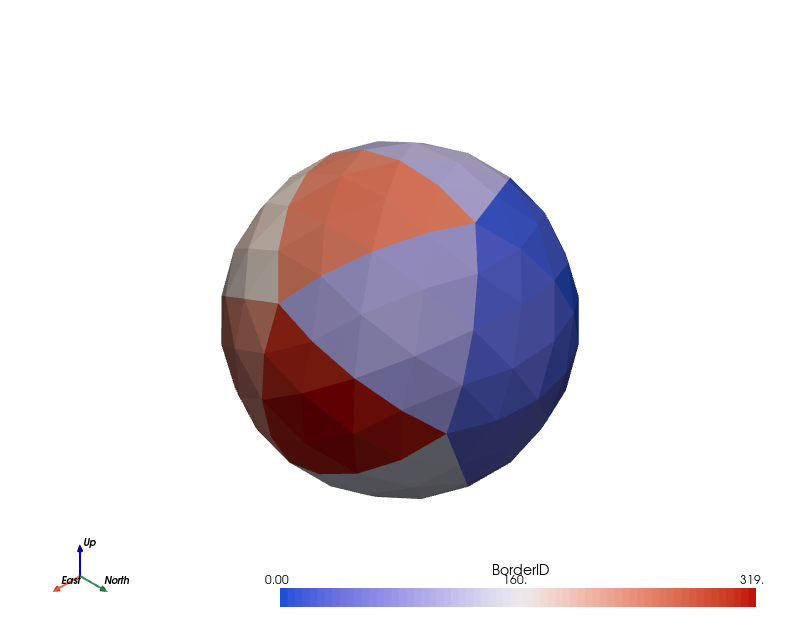

In [7]:
plot_domain(domain,value="BorderID")

_____________

# Create a complex domain from geometry files
The model volume may be divided in several sub-domains, that may be defined from different fracture properties. 
Here, we create complex sub-domains from imported geometries.

### Import sub-domain geometries¶ 

First, we import all sub-domains geometries. Currently, DFN.Lab only supports STL file format (either ASCII or binary).


In [8]:
import dfnlab.Geometry as geom
stlReaders = []
stlFileList=["./sources/STL-Example/domain1.stl","./sources/STL-Example/domain2.stl"]
for stlFile in stlFileList:   
    reader = geom.STLReader(stlFile)
    stlReaders.append(reader)

If needed, you can even rotate sub-domains using this command: 
```python
reader.rotate(axis, angle)
```
Or translate them using :
```python
reader.translate((x,y,z))
```

### Create the fracture domains

The imported geometries must be transformed to DFN.Lab "fracture domains". A fracture domain is a volume which contains fractures with characteristic statistically different from the fractures in neighbouring domains.

In [9]:
fractureDomains = []
for reader in stlReaders:
    fractureDomain = dom.FractureDomain(reader.getDomain())
    fractureDomains.append(fractureDomain)

### Create the global domain 

We create the global domain (i.e., the model volume) and then add the two fracture domains to the global domain.

In [10]:
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=20) 
for fractureDomain in fractureDomains :
    domain.addFractureDomain(fractureDomain)

### Create an Octree in the global domain hosting the two fracture domains

In DFN.lab, fracture domains within the global domain are discretized using an octree grid. The octree structure offers rapid calculations for identifying whether a 3D coordinate belongs to a specific fracture domain.

The octree grid's resolution limit, defined as the octree grid refinement level, determines the precision of the discretization. A higher resolution provides a more precise representation of the fracture domains. By setting a depth limit of 5, the 3D global domain can be subdivided up to 5 times along boundaries between fracture domains.

This octree-based discretization ensures efficient and accurate analysis of the 3D space, allowing for effective handling of complex fracture networks in the software. 

It is important to note that if no specific fracture domains are defined, meaning there's only the global domain, the octree discretization is not necessary.


In [11]:
domain.populateOctree(limit=5)

Below we show the geometry of the two imported domains, and the obtained octree.

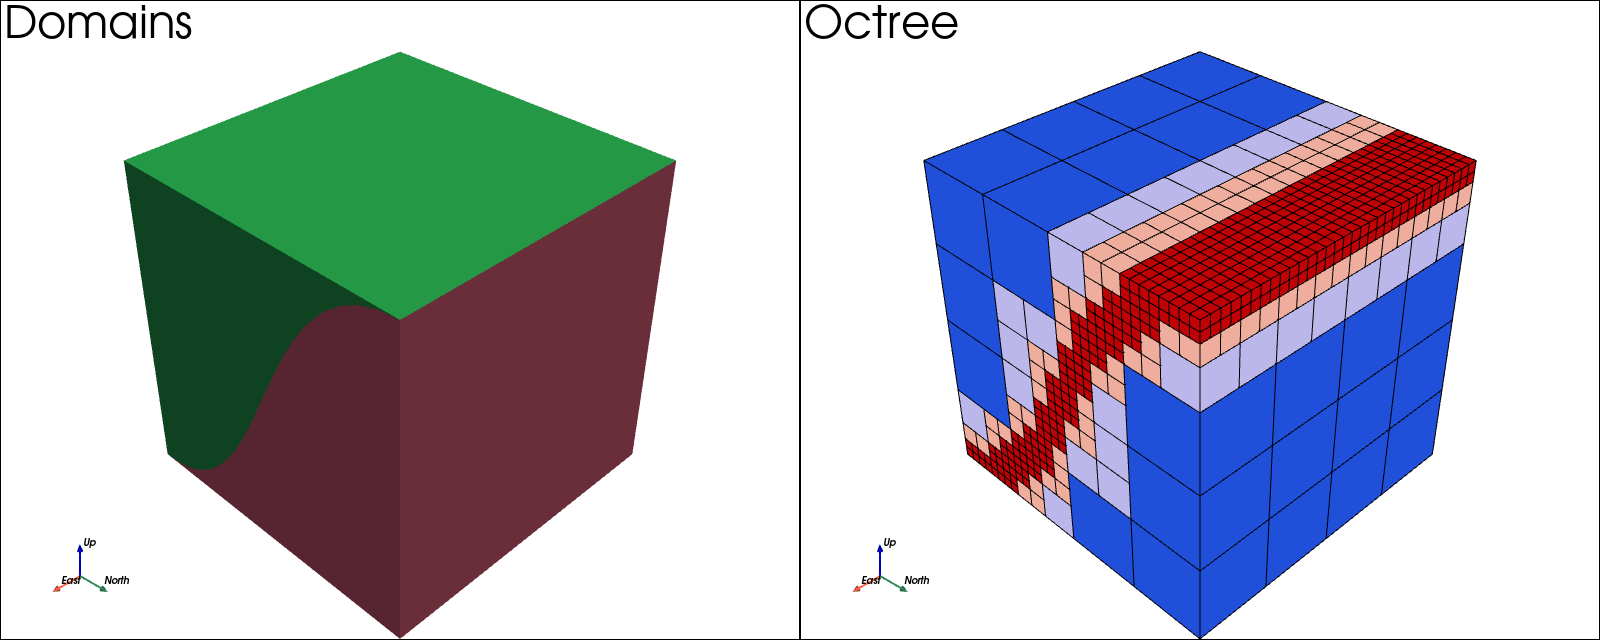

In [12]:
from sources.functions import plot_octree_and_domains
plot_octree_and_domains(domain,stlFileList)